In [1]:
# Initialize Spark session
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CapstoneProject").getOrCreate()
print("Spark session initialized.")

#my Old code
# Initialize Spark session
#from pyspark.sql import SparkSession

#spark = SparkSession.builder.appName("C:\Users\ayman\Data").getOrCreate()
#print("Spark session initialized.")

KeyboardInterrupt: 

In [167]:
from pyspark.sql import SparkSession

#Initialize SparkSession
spark = SparkSession.builder.appName("C:/Users/ayman/spark-3.5.1-bin-hadoop3/spark-3.5.1-bin-hadoop3/mysql-connector-j-9.0.0/src/main/user-impl/java/com/mysql/cj/jdbc")\

#Read a JSON file
df = spark.builder.json("C:\Users\ayman\Data")

#Display the DataFrame
df.show()

AttributeError: 'Builder' object has no attribute 'builder'

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SimpleSparkJob") \
    
print("Spark session initialized.")

Spark session initialized.


In [3]:
spark = SparkSession.builder \
    .appName("CapstoneProject") \
    .config("spark.jars", jdbc_driver_path) \
    .config("spark.driver.extraClassPath", jdbc_driver_path) \
    .config("spark.driver.memory", "8g") 

NameError: name 'jdbc_driver_path' is not defined

In [4]:
# Cell 2: Database Connection
import mysql.connector
from pyspark.sql.functions import col, when, count
import matplotlib.pyplot as plt
from pyspark.sql import DataFrame

def create_db_connection():
    connection = mysql.connector.connect(
        host=secrets['DB_HOST'],
        user=secrets['DB_USER'],
        password=secrets['DB_PASSWORD'],
        database=secrets['DB_NAME']
    )
    return connection

def test_connection():
    try:
        connection = create_db_connection()
        if connection.is_connected():
            print("Connected to the database")
            cursor = connection.cursor()
            cursor.execute("SHOW TABLES;")
            for table in cursor.fetchall():
                print(table)
            cursor.close()
        connection.close()
    except mysql.connector.Error as err:
        print(f"Error: {err}")

test_connection()

NameError: name 'secrets' is not defined

In [5]:
# Cell 3: Create tables in MySQL database
def create_tables():
    connection = create_db_connection()
    cursor = connection.cursor()

    cursor.execute('''
    CREATE TABLE IF NOT EXISTS CDW_SAPP_CUSTOMER (
        SSN INT PRIMARY KEY,
        FIRST_NAME VARCHAR(50),
        LAST_NAME VARCHAR(50),
        CREDIT_CARD_NO VARCHAR(20),
        FULL_STREET_ADDRESS VARCHAR(100),
        CUST_CITY VARCHAR(50),
        CUST_STATE VARCHAR(50),
        CUST_COUNTRY VARCHAR(50),
        CUST_ZIP INT,
        CUST_PHONE VARCHAR(15),
        CUST_EMAIL VARCHAR(50),
        LAST_UPDATED TIMESTAMP,
        MIDDLE_NAME VARCHAR(50),
        APT_NO VARCHAR(10)
    );
    ''')

    cursor.execute('''
    CREATE TABLE IF NOT EXISTS CDW_SAPP_CREDITCARD (
        TRANSACTION_ID INT PRIMARY KEY,
        DAY INT,
        MONTH INT,
        YEAR INT,
        CREDIT_CARD_NO VARCHAR(20),
        CUST_SSN INT,
        BRANCH_CODE INT,
        TRANSACTION_TYPE VARCHAR(50),
        TRANSACTION_VALUE FLOAT
    );
    ''')

    cursor.execute('''
    CREATE TABLE IF NOT EXISTS CDW_SAPP_BRANCH (
        BRANCH_CODE INT PRIMARY KEY,
        BRANCH_NAME VARCHAR(50),
        BRANCH_STREET_ADDRESS VARCHAR(100),
        BRANCH_CITY VARCHAR(50),
        BRANCH_STATE VARCHAR(50),
        BRANCH_ZIP INT,
        BRANCH_PHONE VARCHAR(15),
        LAST_UPDATED TIMESTAMP
    );
    ''')

    connection.commit()
    cursor.close()
    connection.close()
    print("Tables created successfully.")

create_tables()

NameError: name 'secrets' is not defined

In [ ]:
# Cell 4: enter sample data into MySQL tables
def insert_sample_data():
    connection = create_db_connection()
    cursor = connection.cursor()

    cursor.execute('''
    INSERT INTO CDW_SAPP_CUSTOMER (SSN, FIRST_NAME, LAST_NAME, CREDIT_CARD_NO, CUST_CITY, CUST_STATE, CUST_COUNTRY, CUST_ZIP, CUST_PHONE, CUST_EMAIL, LAST_UPDATED, MIDDLE_NAME, APT_NO)
    VALUES (123456789, 'John', 'Doe', '1234567812345678', 'Anytown', 'Anystate', 'USA', 12345, '123-456-7890', 'john.doe@example.com', '2018-01-01 00:00:00', 'A.', '12A')
    ON DUPLICATE KEY UPDATE SSN=VALUES(SSN);
    ''')

    cursor.execute('''
    INSERT INTO CDW_SAPP_CREDITCARD (TRANSACTION_ID, DAY, MONTH, YEAR, CREDIT_CARD_NO, CUST_SSN, BRANCH_CODE, TRANSACTION_TYPE, TRANSACTION_VALUE)
    VALUES (1, 14, 2, 2018, '1234567812345678', 123456789, 100, 'Education', 78.9)
    ON DUPLICATE KEY UPDATE TRANSACTION_ID=VALUES(TRANSACTION_ID);
    ''')

    cursor.execute('''
    INSERT INTO CDW_SAPP_BRANCH (BRANCH_CODE, BRANCH_NAME, BRANCH_STREET_ADDRESS, BRANCH_CITY, BRANCH_STATE, BRANCH_ZIP, BRANCH_PHONE, LAST_UPDATED)
    VALUES (100, 'Main Branch', '123 Main St', 'Anytown', 'Anystate', 12345, '123-456-7890', '2018-01-01 00:00:00')
    ON DUPLICATE KEY UPDATE BRANCH_CODE=VALUES(BRANCH_CODE);
    ''')

    connection.commit()
    cursor.close()
    connection.close()
    print("Sample data inserted successfully.")

insert_sample_data()

Sample data inserted successfully.


In [ ]:
# Cell 5: Defining column mappings for each table
customer_column_mapping = {
    'SSN': 'SSN',
    'FIRST_NAME': 'FIRST_NAME',
    'LAST_NAME': 'LAST_NAME',
    'CREDIT_CARD_NO': 'CREDIT_CARD_NO',
    'CUST_CITY': 'CUST_CITY',
    'CUST_STATE': 'CUST_STATE',
    'CUST_COUNTRY': 'CUST_COUNTRY',
    'CUST_ZIP': 'CUST_ZIP',
    'CUST_PHONE': 'CUST_PHONE',
    'CUST_EMAIL': 'CUST_EMAIL',
    'LAST_UPDATED': 'LAST_UPDATED',
    'MIDDLE_NAME': 'MIDDLE_NAME',
    'APT_NO': 'APT_NO'
}

creditcard_column_mapping = {
    'TRANSACTION_ID': 'TRANSACTION_ID',
    'DAY': 'DAY',
    'MONTH': 'MONTH',
    'YEAR': 'YEAR',
    'CREDIT_CARD_NO': 'CREDIT_CARD_NO',
    'CUST_SSN': 'CUST_SSN',
    'BRANCH_CODE': 'BRANCH_CODE',
    'TRANSACTION_TYPE': 'TRANSACTION_TYPE',
    'TRANSACTION_VALUE': 'TRANSACTION_VALUE'
}

branch_column_mapping = {
    'BRANCH_CODE': 'BRANCH_CODE',
    'BRANCH_NAME': 'BRANCH_NAME',
    'BRANCH_PHONE': 'BRANCH_PHONE',
    'LAST_UPDATED': 'LAST_UPDATED',
    'FULL_BRANCH_ADDRESS': 'FULL_BRANCH_ADDRESS'
}

In [171]:
# Cell 6: Load JSON data into DataFrames
customer_file = "C:/Users/ayman/OneDrive/Desktop/Capstone_project/Data/cdw_sapp_customer.json"
creditcard_file = "C:/Users/ayman/OneDrive/Desktop/Capstone_project/Data/cdw_sapp_credit.json"
branch_file = "C:/Users/ayman/OneDrive/Desktop/Capstone_project/Data/cdw_sapp_branch (1).json"

df_customer = spark.read.option("multiline", "true").json(customer_file)
df_creditcard = spark.read.option("multiline", "true").json(creditcard_file)
df_branch = spark.read.option("multiline", "true").json(branch_file)

def show_df_info(df, name):
    if df is not None:
        print(f"\n{name} Schema:")
        df.printSchema()
        print(f"\n{name} Sample Data:")
        df.show(5)
    else:
        print(f"\n{name} is not loaded.")

show_df_info(df_customer, "Customer Data")
show_df_info(df_creditcard, "Credit Card Data")
show_df_info(df_branch, "Branch Data")

AttributeError: 'Builder' object has no attribute 'read'

In [ ]:
# Cell 7: Combine columns into a single column for branch address
from pyspark.sql.functions import concat_ws

df_branch = spark.read.option("multiline", "true").json(branch_file)

df_branch.printSchema()

df_branch = df_branch.withColumn(
    "FULL_BRANCH_ADDRESS",
    concat_ws(", ", "BRANCH_STREET", "BRANCH_CITY", "BRANCH_STATE", "BRANCH_ZIP")
)
df_branch.show(5)

root
 |-- BRANCH_CITY: string (nullable = true)
 |-- BRANCH_CODE: long (nullable = true)
 |-- BRANCH_NAME: string (nullable = true)
 |-- BRANCH_PHONE: string (nullable = true)
 |-- BRANCH_STATE: string (nullable = true)
 |-- BRANCH_STREET: string (nullable = true)
 |-- BRANCH_ZIP: long (nullable = true)
 |-- LAST_UPDATED: string (nullable = true)

+-----------------+-----------+------------+------------+------------+-----------------+----------+--------------------+--------------------+
|      BRANCH_CITY|BRANCH_CODE| BRANCH_NAME|BRANCH_PHONE|BRANCH_STATE|    BRANCH_STREET|BRANCH_ZIP|        LAST_UPDATED| FULL_BRANCH_ADDRESS|
+-----------------+-----------+------------+------------+------------+-----------------+----------+--------------------+--------------------+
|        Lakeville|          1|Example Bank|  1234565276|          MN|     Bridle Court|     55044|2018-04-18T16:51:...|Bridle Court, Lak...|
|          Huntley|          2|Example Bank|  1234618993|          IL|Washington S

In [ ]:
#Cell 8: Load data into mysql tables
from pyspark.sql import DataFrame

def load_data_to_mysql(df: DataFrame, table_name: str, column_mapping: dict):
    connection = create_db_connection()
    cursor = connection.cursor()
    
    for row in df.collect():
        placeholders = ', '.join(['%s'] * len(column_mapping))
        columns = ', '.join(column_mapping.keys())
        update_placeholders = ', '.join([f"{col}=VALUES({col})" for col in column_mapping.keys()])
        sql = f"""
        INSERT INTO {table_name} ({columns}) VALUES ({placeholders})
        ON DUPLICATE KEY UPDATE {update_placeholders}
        """
        
        values = [str(row[column_mapping[key]]) if row[column_mapping[key]] is not None else None for key in column_mapping.keys()]
        
        try:
            print(f"Inserting into {table_name}: {values}")  
            cursor.execute(sql, tuple(values))
        except mysql.connector.Error as err:
            print(f"Error: {err}")
            print(f"SQL: {sql}")
            print(f"Values: {values}")
    
    connection.commit()
    cursor.close()
    connection.close()
    print(f"Data loaded into {table_name} table.")

# Ensure DataFrames are loaded before calling this function
if 'df_customer' in locals() and 'df_creditcard' in locals() and 'df_branch' in locals():
    load_data_to_mysql(df_customer, 'CDW_SAPP_CUSTOMER', customer_column_mapping)
    load_data_to_mysql(df_creditcard, 'CDW_SAPP_CREDITCARD', creditcard_column_mapping)
    load_data_to_mysql(df_branch, 'CDW_SAPP_BRANCH', branch_column_mapping)
else:
    print("DataFrames are not loaded properly.")

Inserting into CDW_SAPP_CUSTOMER: ['123456100', 'Alec', 'Hooper', '4210653310061055', 'Natchez', 'MS', 'United States', '39120', '1237818', 'AHooper@example.com', '2018-04-21T12:49:02.000-04:00', 'Wm', '656']
Inserting into CDW_SAPP_CUSTOMER: ['123453023', 'Etta', 'Holman', '4210653310102868', 'Wethersfield', 'CT', 'United States', '06109', '1238933', 'EHolman@example.com', '2018-04-21T12:49:02.000-04:00', 'Brendan', '829']
Inserting into CDW_SAPP_CUSTOMER: ['123454487', 'Wilber', 'Dunham', '4210653310116272', 'Huntley', 'IL', 'United States', '60142', '1243018', 'WDunham@example.com', '2018-04-21T12:49:02.000-04:00', 'Ezequiel', '683']
Inserting into CDW_SAPP_CUSTOMER: ['123459758', 'Eugenio', 'Hardy', '4210653310195948', 'NewBerlin', 'WI', 'United States', '53151', '1243215', 'EHardy@example.com', '2018-04-21T12:49:02.000-04:00', 'Trina', '253']
Inserting into CDW_SAPP_CUSTOMER: ['123454431', 'Wilfred', 'Ayers', '4210653310356919', 'ElPaso', 'TX', 'United States', '79930', '1242074',

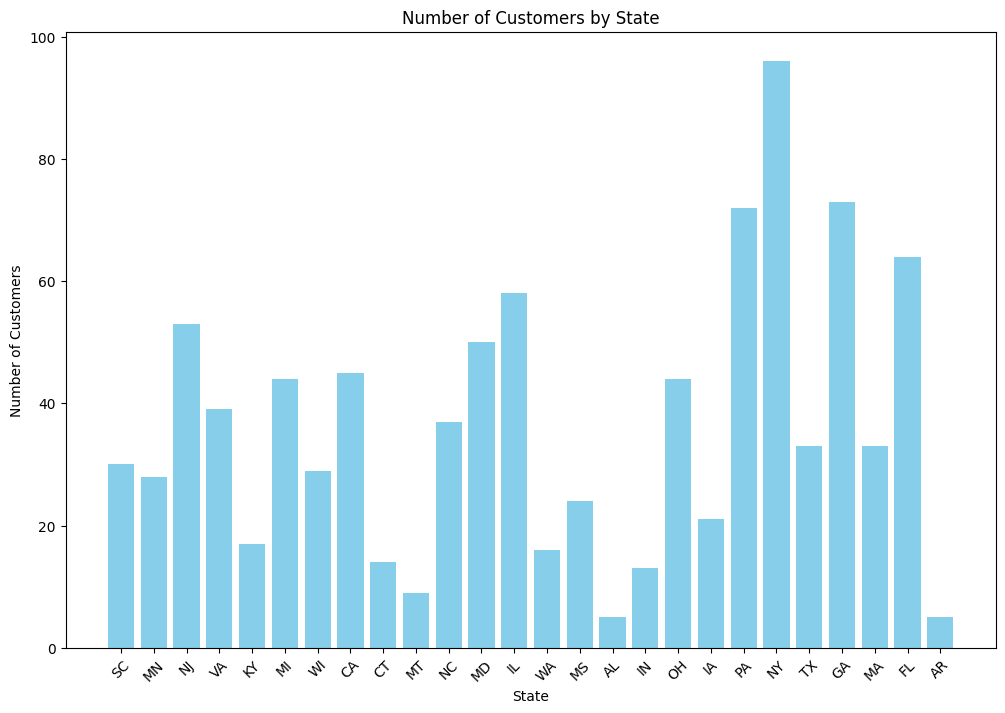

In [ ]:
# Cell 9: visual for customer counts by state
customer_counts_by_state = df_customer.groupBy('CUST_STATE').count()
customer_counts_by_state_pd = customer_counts_by_state.toPandas()

plt.figure(figsize=(12, 8))
plt.bar(customer_counts_by_state_pd['CUST_STATE'], customer_counts_by_state_pd['count'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by State')
plt.xticks(rotation=45)
plt.show()

+-----+----------------------+
|MONTH|sum(TRANSACTION_VALUE)|
+-----+----------------------+
|    7|    201199.35000000056|
|    6|     195468.7399999999|
|    9|    196069.44000000035|
|    5|     201310.2599999996|
|    1|    196568.86999999953|
|   10|    202583.88999999958|
|    3|    196488.59000000023|
|   12|    201251.08000000025|
|    8|    196453.41000000018|
|   11|    200549.36000000002|
|    2|    201086.67000000013|
|    4|    194203.24999999983|
+-----+----------------------+



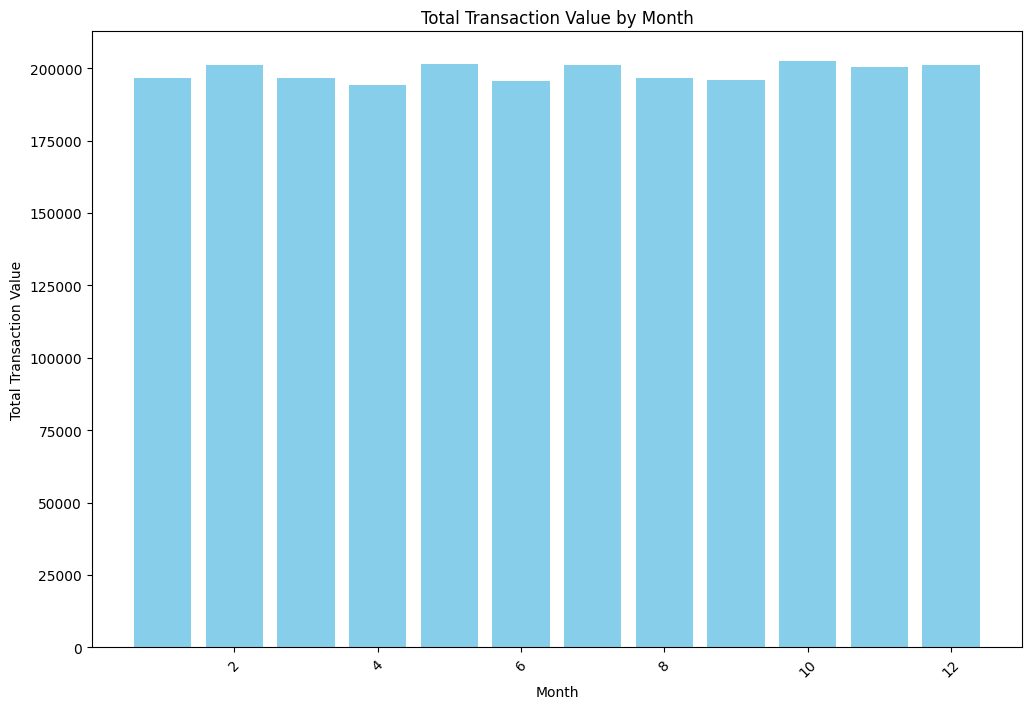

In [ ]:
# Cell 10: visuals for total transaction value for each month
monthly_transaction_values = df_creditcard.groupBy('MONTH').sum('TRANSACTION_VALUE')
monthly_transaction_values.show()

monthly_transaction_values_pd = monthly_transaction_values.toPandas()

plt.figure(figsize=(12, 8))
plt.bar(monthly_transaction_values_pd['MONTH'], monthly_transaction_values_pd['sum(TRANSACTION_VALUE)'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value')
plt.title('Total Transaction Value by Month')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Cell 11: Checking for missing data in customer, credit card, and branch data
missing_data_customer = df_customer.select([count(when(col(c).isNull(), c)).alias(c) for c in df_customer.columns])
missing_data_customer.show()

missing_data_creditcard = df_creditcard.select([count(when(col(c).isNull(), c)).alias(c) for c in df_creditcard.columns])
missing_data_creditcard.show()

missing_data_branch = df_branch.select([count(when(col(c).isNull(), c)).alias(c) for c in df_branch.columns])
missing_data_branch.show()

+------+--------------+---------+------------+----------+----------+----------+--------+----------+---------+------------+-----------+---+-----------+
|APT_NO|CREDIT_CARD_NO|CUST_CITY|CUST_COUNTRY|CUST_EMAIL|CUST_PHONE|CUST_STATE|CUST_ZIP|FIRST_NAME|LAST_NAME|LAST_UPDATED|MIDDLE_NAME|SSN|STREET_NAME|
+------+--------------+---------+------------+----------+----------+----------+--------+----------+---------+------------+-----------+---+-----------+
|     0|             0|        0|           0|         0|         0|         0|       0|         0|        0|           0|          0|  0|          0|
+------+--------------+---------+------------+----------+----------+----------+--------+----------+---------+------------+-----------+---+-----------+

+-----------+--------------+--------+---+-----+--------------+----------------+-----------------+----+
|BRANCH_CODE|CREDIT_CARD_NO|CUST_SSN|DAY|MONTH|TRANSACTION_ID|TRANSACTION_TYPE|TRANSACTION_VALUE|YEAR|
+-----------+--------------+--------+-

+---------+-----------------------+
| CUST_SSN|Total_Transaction_Value|
+---------+-----------------------+
|123455659|     1357.0900000000001|
|123455001|     3310.4200000000005|
|123454851|     1181.3300000000002|
|123453245|                 560.62|
|123452490|                4471.92|
+---------+-----------------------+
only showing top 5 rows



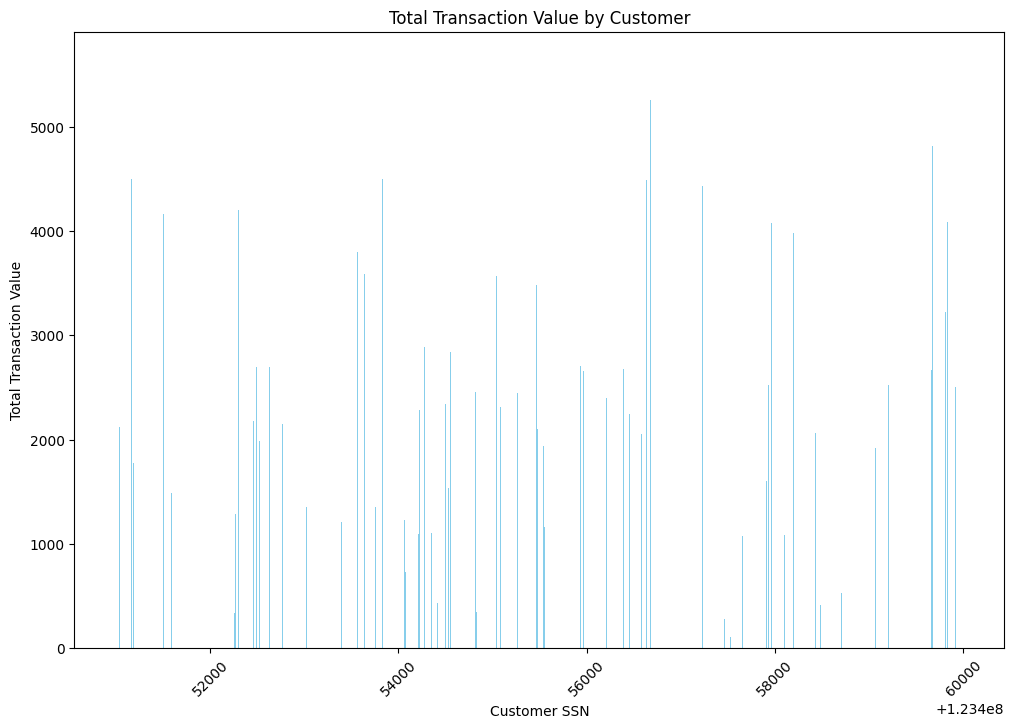

In [ ]:
# Cell 12: Calculate and visualize total transaction amount by customer
total_transaction_by_customer = df_creditcard.groupBy("CUST_SSN").sum("TRANSACTION_VALUE")
total_transaction_by_customer = total_transaction_by_customer.withColumnRenamed("sum(TRANSACTION_VALUE)", "Total_Transaction_Value")
total_transaction_by_customer.show(5)

total_transaction_by_customer_pd = total_transaction_by_customer.toPandas()

plt.figure(figsize=(12, 8))
plt.bar(total_transaction_by_customer_pd['CUST_SSN'], total_transaction_by_customer_pd['Total_Transaction_Value'], color='skyblue')
plt.xlabel('Customer SSN')
plt.ylabel('Total Transaction Value')
plt.title('Total Transaction Value by Customer')
plt.xticks(rotation=45)
plt.show()

+---------+-----------------------+
| CUST_SSN|Total_Transaction_Value|
+---------+-----------------------+
|123451125|     5633.0700000000015|
|123452783|      5548.140000000001|
|123453486|      5476.079999999999|
|123458668|      5314.970000000003|
|123456678|      5261.030000000001|
|123452026|                5241.18|
|123452518|      5223.959999999999|
|123454933|      5203.080000000001|
|123457547|                5149.75|
|123452085|      5133.290000000002|
+---------+-----------------------+



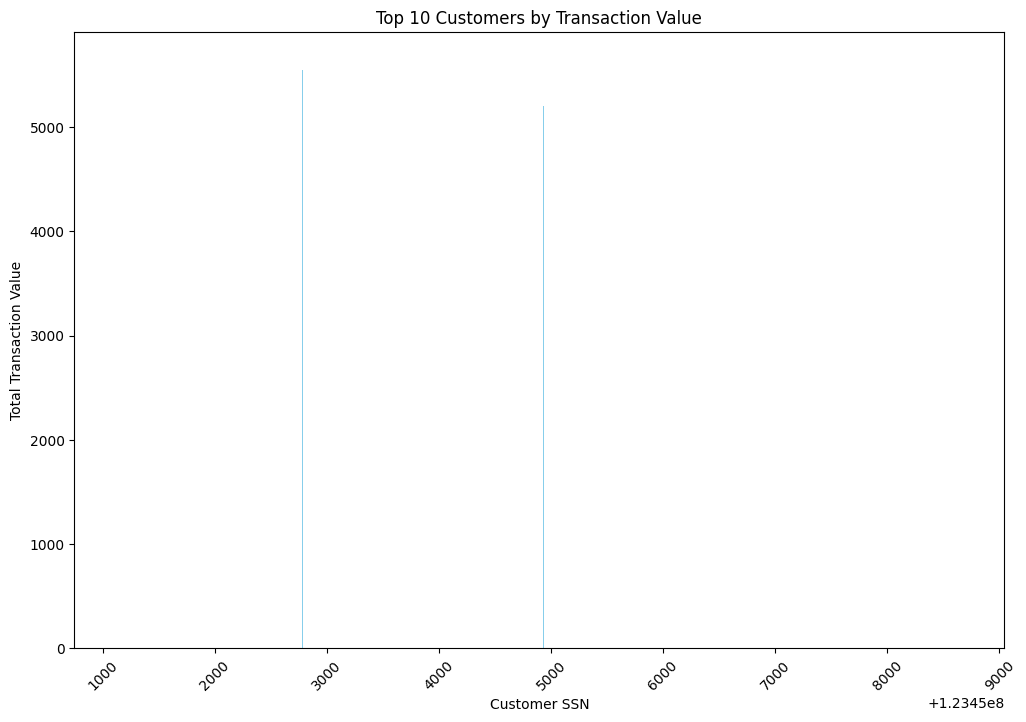

In [ ]:
# Cell 13: visual for top 10 customers by transaction value
top_10_customers = total_transaction_by_customer.orderBy(total_transaction_by_customer['Total_Transaction_Value'].desc()).limit(10)
top_10_customers.show()

top_10_customers_pd = top_10_customers.toPandas()

plt.figure(figsize=(12, 8))
plt.bar(top_10_customers_pd['CUST_SSN'], top_10_customers_pd['Total_Transaction_Value'], color='skyblue')
plt.xlabel('Customer SSN')
plt.ylabel('Total Transaction Value')
plt.title('Top 10 Customers by Transaction Value')
plt.xticks(rotation=45)
plt.show()

+-----+----------------------+
|MONTH|Number_of_Transactions|
+-----+----------------------+
|    7|                  3935|
|    6|                  3819|
|    9|                  3886|
|    5|                  3946|
|    1|                  3814|
|   10|                  3946|
|    3|                  3851|
|   12|                  3936|
|    8|                  3861|
|   11|                  3901|
|    2|                  3959|
|    4|                  3840|
+-----+----------------------+



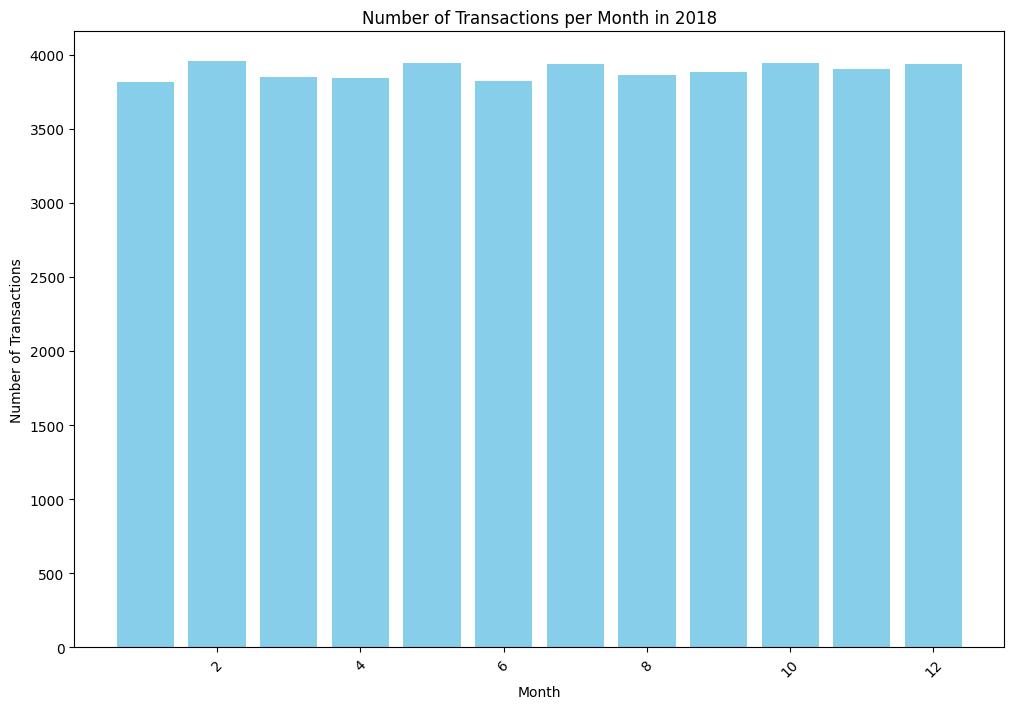

In [ ]:
# Cell 14: visual for number of transactions per month in **2018**
transactions_2018 = df_creditcard.filter(df_creditcard["YEAR"] == 2018)
transactions_per_month_2018 = transactions_2018.groupBy("MONTH").count()
transactions_per_month_2018 = transactions_per_month_2018.withColumnRenamed("count", "Number_of_Transactions")
transactions_per_month_2018.show()

transactions_per_month_2018_pd = transactions_per_month_2018.toPandas()

plt.figure(figsize=(12, 8))
plt.bar(transactions_per_month_2018_pd['MONTH'], transactions_per_month_2018_pd['Number_of_Transactions'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Month in 2018')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Cell 15: Function to retrieve customer information by SSN
def get_customer_info_by_ssn(ssn):
    connection = create_db_connection()
    cursor = connection.cursor()
    
    query = f"""
    SELECT * FROM CDW_SAPP_CUSTOMER
    WHERE SSN = {ssn}
    """
    
    cursor.execute(query)
    result = cursor.fetchall()
    
    for row in result:
        print(row)
    
    connection.close()

In [ ]:
# Cell 16: Function to retrieve transactions by credit card number
def get_transactions_by_credit_card(credit_card_no):
    connection = create_db_connection()
    cursor = connection.cursor()
    
    query = f"""
    SELECT * FROM CDW_SAPP_CREDITCARD
    WHERE CREDIT_CARD_NO = '{credit_card_no}'
    """
    
    cursor.execute(query)
    result = cursor.fetchall()
    
    for row in result:
        print(row)
    
    connection.close()

In [ ]:
# Cell 17: Function to retrieve branch information by branch state
def get_branch_info_by_state(branch_state):
    connection = create_db_connection()
    cursor = connection.cursor()
    
    query = f"""
    SELECT * FROM CDW_SAPP_BRANCH
    WHERE BRANCH_STATE = '{branch_state}'
    """
    
    cursor.execute(query)
    result = cursor.fetchall()
    
    for row in result:
        print(row)
    
    connection.close()

In [ ]:
# Cell 18: Create views for customer information, transactions, and branch information
def create_views():
    connection = create_db_connection()
    cursor = connection.cursor()

    customer_view_query = """
    CREATE OR REPLACE VIEW CustomerInfoBySSN AS
    SELECT * FROM CDW_SAPP_CUSTOMER
    """
    cursor.execute(customer_view_query)
    
    transactions_view_query = """
    CREATE OR REPLACE VIEW TransactionsByCreditCard AS
    SELECT * FROM CDW_SAPP_CREDITCARD
    """
    cursor.execute(transactions_view_query)
    
    branch_view_query = """
    CREATE OR REPLACE VIEW BranchInfoByState AS
    SELECT * FROM CDW_SAPP_BRANCH
    """
    cursor.execute(branch_view_query)

    connection.commit()
    cursor.close()
    connection.close()
    print("Views created successfully.")

create_views()

Views created successfully.


In [6]:
# Cell 19: Application Front-End
def menu():
    while True:
        print("\n--- Menu ---")
        print("1. Transaction Details")
        print("2. Customer Details")
        print("3. Exit")
        choice = input("Enter choice: ")

        if choice == '1':
            zip_code = input("Enter zip code: ")
            month = input("Enter month (MM): ")
            year = input("Enter year (YYYY): ")
            transaction_details(zip_code, month, year)
        elif choice == '2':
            print("\n--- Customer Details ---")
            print("1. Check Account Details")
            print("2. Modify Account Details")
            print("3. Generate Monthly Bill")
            print("4. Display Transactions Between Dates")
            sub_choice = input("Enter choice: ")

            if sub_choice == '1':
                ssn = input("Enter SSN: ")
                get_customer_details(ssn)
            elif sub_choice == '2':
                ssn = input("Enter SSN: ")
                column = input("Enter column to modify: ")
                new_value = input("Enter new value: ")
                modify_customer_details(ssn, column, new_value)
            elif sub_choice == '3':
                credit_card_no = input("Enter credit card number: ")
                month = input("Enter month (MM): ")
                year = input("Enter year (YYYY): ")
                generate_monthly_bill(credit_card_no, month, year)
            elif sub_choice == '4':
                ssn = input("Enter SSN: ")
                start_date = input("Enter start date (YYYY-MM-DD): ")
                end_date = input("Enter end date (YYYY-MM-DD): ")
                transactions_between_dates(ssn, start_date, end_date)
            else:
                print("Invalid choice")
        elif choice == '3':
            break
        else:
            print("Invalid choice")

def transaction_details(zip_code, month, year):
    connection = create_db_connection()
    cursor = connection.cursor()

    query = f"""
    SELECT * FROM CDW_SAPP_CREDITCARD
    WHERE CUST_ZIP = {zip_code} AND MONTH = {month} AND YEAR = {year}
    ORDER BY DAY DESC
    """
    cursor.execute(query)
    result = cursor.fetchall()

    for row in result:
        print(row)

    connection.close()

def get_customer_details(ssn):
    connection = create_db_connection()
    cursor = connection.cursor()

    query = f"""
    SELECT * FROM CDW_SAPP_CUSTOMER
    WHERE SSN = {ssn}
    """
    cursor.execute(query)
    result = cursor.fetchall()

    for row in result:
        print(row)

    connection.close()

def modify_customer_details(ssn, column, new_value):
    connection = create_db_connection()
    cursor = connection.cursor()

    query = f"""
    UPDATE CDW_SAPP_CUSTOMER
    SET {column} = '{new_value}'
    WHERE SSN = {ssn}
    """
    cursor.execute(query)
    connection.commit()

    print(f"Customer details updated for SSN: {ssn}")

    connection.close()

def generate_monthly_bill(credit_card_no, month, year):
    connection = create_db_connection()
    cursor = connection.cursor()

    query = f"""
    SELECT SUM(TRANSACTION_VALUE) as total
    FROM CDW_SAPP_CREDITCARD
    WHERE CREDIT_CARD_NO = '{credit_card_no}' AND MONTH = {month} AND YEAR = {year}
    """
    cursor.execute(query)
    result = cursor.fetchone()
    print(f"Total bill for {credit_card_no} for {month}/{year} is: ${result[0]}")

    connection.close()

def transactions_between_dates(ssn, start_date, end_date):
    connection = create_db_connection()
    cursor = connection.cursor()

    query = f"""
    SELECT * FROM CDW_SAPP_CREDITCARD
    WHERE CUST_SSN = {ssn} AND TRANSACTION_DATE BETWEEN '{start_date}' AND '{end_date}'
    ORDER BY YEAR DESC, MONTH DESC, DAY DESC
    """
    cursor.execute(query)
    result = cursor.fetchall()

    for row in result:
        print(row)

    connection.close()

menu()


--- Menu ---
1. Transaction Details
2. Customer Details
3. Exit


NameError: name 'secrets' is not defined

In [169]:
# Cell 20: Load Loan Application Data
import requests
import json

loan_data_url = "https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json"
response = requests.get(loan_data_url)

if response.status_code == 200:
    loan_data = response.json()
    loan_df = spark.createDataFrame(loan_data)

    # Display the schema and first few rows to ensure data is loaded correctly
    loan_df.printSchema()
    loan_df.show(5)
    
    try:
        print("Attempting to write to MySQL database...")
        loan_df.write.format("jdbc")\
            .option("url", f"jdbc:mysql://{secrets['DB_HOST']}/{secrets['DB_NAME']}")\
            .option("dbtable", "CDW_SAPP_LOAN_APPLICATION")\
            .option("user", secrets['DB_USER'])\
            .option("password", secrets['DB_PASSWORD'])\
            .option("driver", "com.mysql.cj.jdbc.Driver")\
            .save()
        print("Loan application data loaded successfully.")
    except Exception as e:
        print(f"Failed to load data into MySQL. Error: {e}")
else:
    print(f"Failed to fetch loan data. Status code: {response.status_code}")

AttributeError: 'Builder' object has no attribute 'createDataFrame'

In [168]:
# Cell 21: Visualizations for Loan Application Data
import matplotlib.pyplot as plt

loan_df = spark.read.format("jdbc").option("url", f"jdbc:mysql://{secrets['DB_HOST']}/{secrets['DB_NAME']}").option("dbtable", "CDW_SAPP_LOAN_APPLICATION").option("user", secrets['DB_USER']).option("password", secrets['DB_PASSWORD']).load()

approved_self_employed = loan_df.filter((loan_df.Self_Employed == 'Yes') & (loan_df.Loan_Status == 'Y')).count()
total_self_employed = loan_df.filter(loan_df.Self_Employed == 'Yes').count()
approval_percentage = (approved_self_employed / total_self_employed) * 100

plt.figure(figsize=(8, 6))
plt.bar(['Approved', 'Rejected'], [approval_percentage, 100 - approval_percentage], color=['green', 'red'])
plt.title('Approval Percentage for Self-Employed Applicants')
plt.ylabel('Percentage')
plt.show()

rejected_married_males = loan_df.filter((loan_df.Gender == 'Male') & (loan_df.Married == 'Yes') & (loan_df.Loan_Status == 'N')).count()
total_married_males = loan_df.filter((loan_df.Gender == 'Male') & (loan_df.Married == 'Yes')).count()
rejection_percentage = (rejected_married_males / total_married_males) * 100

plt.figure(figsize=(8, 6))
plt.bar(['Rejected', 'Approved'], [rejection_percentage, 100 - rejection_percentage], color=['red', 'green'])
plt.title('Rejection Percentage for Married Male Applicants')
plt.ylabel('Percentage')
plt.show()

transactions_per_month = df_creditcard.groupBy('MONTH').count().orderBy('count', ascending=False).limit(3)
transactions_per_month_pd = transactions_per_month.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(transactions_per_month_pd['MONTH'], transactions_per_month_pd['count'], color='skyblue')
plt.title('Top Three Months with the Largest Volume of Transaction Data')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

healthcare_transactions = df_creditcard.filter(df_creditcard.TRANSACTION_TYPE == 'Healthcare').groupBy('BRANCH_CODE').sum('TRANSACTION_VALUE').orderBy('sum(TRANSACTION_VALUE)', ascending=False).limit(1)
healthcare_transactions_pd = healthcare_transactions.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(healthcare_transactions_pd['BRANCH_CODE'], healthcare_transactions_pd['sum(TRANSACTION_VALUE)'], color='purple')
plt.title('Branch with the Highest Total Dollar Value of Healthcare Transactions')
plt.xlabel('Branch Code')
plt.ylabel('Total Transaction Value')
plt.show()

AttributeError: 'Builder' object has no attribute 'read'